I struggled with 15.5 as I had never used TSNE before. I had to use chatgpt and upgrade my components. Then I hit a version change in sickit's TSNE so I had to update the code I had written based on the textbook reference. For 15.17, I had done this before, so it was pretty straightforward.  

15.5 Using TSNE to Visualize the Digits Dataset in 3D
1. Import scikit library and sklearn packages
2. Load x-set features and y-set digit labels
3. Configure t-SNE and stable randomness
4. Compute low-dimensional embedding to fit & transform
5. Graph in 3D with different colors for digit labels

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.354s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.679661
[t-SNE] KL divergence after 1000 iterations: 0.630158


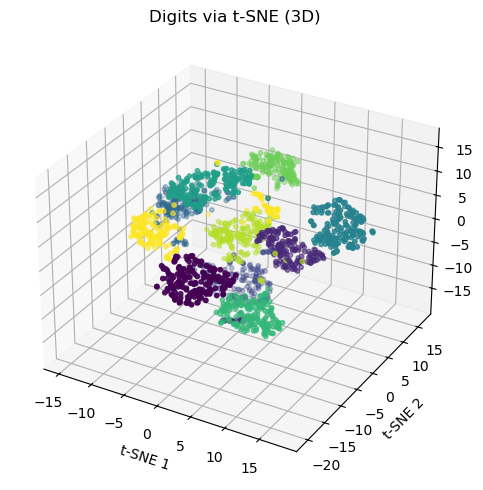

In [6]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

#1. Load digits and features
def main():
    digits = load_digits()
    X = digits.data
    y = digits.target

    #2. Create a TSNE object with 3D output and stable randomness.
    tsne = TSNE(
        n_components=3,
        init="pca",
        learning_rate="auto",
        perplexity=30,
        max_iter=1000,        # <-- updated
        random_state=11,
        verbose=1,
    )

    #3. fit and transform by computing the embedding
    reduced = tsne.fit_transform(X)

    #4. Color by 2 digit labels to see separation
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection="3d")
    sc = ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=y, s=10)
    ax.set_title("Digits via t-SNE (3D)")
    ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2"); ax.set_zlabel("t-SNE 3")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

15.17  Binary Classification with the Breast Cancer Dataset
1. Load dataset from sicket library
2. Split data into training and testing x and y groups
3. Create a K nearest neighbors models
4. Train the model with the train data groups
5. Use X test to predict
6. Create a confusion matrix and classification report
7. Import kfold to test folds for cross-validation, the support vector classifier, and Gaussian Naive Bayes packages
8. Loop through the models & run cross validation

In [7]:
# 1. Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target  # features, labels

# 2. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=11, test_size=0.25
)

# 3. Create a model (try KNN, SVC, GaussianNB, etc.)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 4. Train the model
knn.fit(X_train, y_train)

# 5. Predict
predicted = knn.predict(X_test)
expected = y_test

# 6. Evaluate
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:\n", confusion_matrix(expected, predicted))
print("\nClassification report:\n", classification_report(expected, predicted, 
      target_names=data.target_names))

Confusion matrix:
 [[43  7]
 [ 1 92]]

Classification report:
               precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

estimators = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(gamma="scale"),
    "GaussianNB": GaussianNB()
}

#7. split data into 10 folds, with 1 test set for each
for name, est in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    #8. Run cross-validation
    scores = cross_val_score(est, X, y, cv=kfold)
    print(f"{name:20} mean acc={scores.mean():.3f}  std={scores.std():.3f}")

KNeighborsClassifier mean acc=0.928  std=0.020
SVC                  mean acc=0.919  std=0.035
GaussianNB           mean acc=0.938  std=0.028
